In [1]:
from util import *

pid = start()
test = ida_lib.connect_to_ida(b"5945", pid.encode())
building = call_ida_api_function(ida_lib.openDocument, b"D:\\ide_mine\\changing\\ut1.idm")

In [4]:
res = call_ida_api_function(ida_lib.closeDocument, building)


In [7]:
from collections import defaultdict

def showChildrenList(parent):
    children = call_ida_api_function(ida_lib.childNodes, parent)
    print("value:name")
    nameList = defaultdict(int)
    for child in children:
        name = ida_get_name(child['value'])
        nameList[child['value']]=name

    str(nameList)
    return nameList

In [7]:

children = call_ida_api_function(ida_lib.childNodes, building)
for child in children:
    name = ida_get_name(child['value'])
    print(name)

Kalmar
Kalmar-1968
Floor coating
L/W concrete
Concrete
Concrete floor 150mm
Render
Rendered l/w concrete wall 250
Gypsum
Air in 30 mm vert. air gap
Light insulation
Interior wall with insulation
Concrete floor 250mm
Concrete joist roof
Rendered concrete wall 200
Entrance door
Wood
Aluminium
Inner door
Ground without insulation
3 pane glazing, clear, 4-12-4-12-4
4 mm clear
Clear_glass-EN14501
Energy_glass-EN14501
Argon - EN673 (WIN7)
Air - EN673 (WIN7)
Solar_glass-EN14501
Glazing-A_EN14501
Glazing-B_EN14501
Glazing-C_EN14501
Glazing-D_EN14501
Single Clear (WIN7)
CLEAR_3.DAT (WIN7)
Double Clear Air (WIN7)
CLEAR_6.DAT (WIN7)
Air (WIN7)
Double high solar gain low-e (WIN7)
CLEAR5.LOF (WIN7)
LOW-E_5.LOF (WIN7)
Double low-e (air) - deflected (WIN7)
LoE270-6.CIG (WIN7)
STD-ZONE
LOCATION
WIND-PROFILE
CLIMATE-DEF
Lighting, facility
Lighting, tenant
Equipment, facility
Equipment, tenant
Electric cooling
Fuel cooling
District cooling
HVAC aux
Electric heating
Fuel heating
District heating
Heating,

In [14]:
building_body = ida_get_named_child(building, "Floor_36")
children = call_ida_api_function(ida_lib.childNodes, building_body)
building_body
for child in children:
    name = ida_get_name(child['value'], )
    print(name,type(child['value']))

TypeError: ida_get_name() takes 1 positional argument but 2 were given

In [19]:
building_body = ida_get_named_child(building, "Floor_36")
xx = showChildrenList(building_body)
print(xx)

value:name
defaultdict(<class 'int'>, {93: 'PROTECTED_SHAPE', 94: 'NCORN', 95: 'NCOEF', 96: 'CORNERS', 97: 'CONTOURS', 98: 'HEIGHT', 99: 'BOTTOM', 100: 'SURFACE', 101: 'f1', 102: 'f2', 103: 'f3', 104: 'f4', 105: 'f5', 106: 'f6', 107: 'f7', 108: 'f8', 109: 'f9', 110: 'f10', 111: 'f11', 112: 'f12', 113: 'f13', 114: 'f14', 115: 'f15', 116: 'f16', 117: 'f17', 118: 'f18', 119: 'f19', 120: 'Crawl space', 121: 'Roof'})


In [20]:
def showChildrenList(parent):
    children = call_ida_api_function(ida_lib.childNodes, parent)
    nameList = []
    for child in children:
        name = ida_get_name(child['value'])
        nameList.append(name)

    str(nameList)
    return nameList

In [21]:
print(showChildrenList(building))



['Kalmar', 'Kalmar-1968', 'Floor coating', 'L/W concrete', 'Concrete', 'Concrete floor 150mm', 'Render', 'Rendered l/w concrete wall 250', 'Gypsum', 'Air in 30 mm vert. air gap', 'Light insulation', 'Interior wall with insulation', 'Concrete floor 250mm', 'Concrete joist roof', 'Rendered concrete wall 200', 'Entrance door', 'Wood', 'Aluminium', 'Inner door', 'Ground without insulation', '3 pane glazing, clear, 4-12-4-12-4', '4 mm clear', 'Clear_glass-EN14501', 'Energy_glass-EN14501', 'Argon - EN673 (WIN7)', 'Air - EN673 (WIN7)', 'Solar_glass-EN14501', 'Glazing-A_EN14501', 'Glazing-B_EN14501', 'Glazing-C_EN14501', 'Glazing-D_EN14501', 'Single Clear (WIN7)', 'CLEAR_3.DAT (WIN7)', 'Double Clear Air (WIN7)', 'CLEAR_6.DAT (WIN7)', 'Air (WIN7)', 'Double high solar gain low-e (WIN7)', 'CLEAR5.LOF (WIN7)', 'LOW-E_5.LOF (WIN7)', 'Double low-e (air) - deflected (WIN7)', 'LoE270-6.CIG (WIN7)', 'STD-ZONE', 'LOCATION', 'WIND-PROFILE', 'CLIMATE-DEF', 'Lighting, facility', 'Lighting, tenant', 'Equipm

In [25]:
scriptList =[]
update_1 = '(:UPDATE [@]( '
update_2 = '))'

zone_name ='Zone 1'
zone_1 = '(CE-ZONE :N "' + zone_name+ '")'




In [34]:
thermal_bdg_1 ='( (AGGREGATE :N THERMAL-BRIDGES) '
thermal_bdg_2 =')'
thermal_bdg_win = '(:PAR :N WIN-PERIM-LEN)'                #both det windows and simple windows
thermal_bdg_door = '(:PAR :N DOOR-PERIM-LEN)'
thermal_bdg_tot = thermal_bdg_1+thermal_bdg_win *2 +thermal_bdg_door*0+thermal_bdg_2
thermal_bdg_tot

'( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN)(:PAR :N WIN-PERIM-LEN))'

In [23]:
wall_name ='WALL_6'
door_x = '3.21'
door_y ='1.8'
door_dx ='2'
door_dy = '2'
opening_1 ='( (ENCLOSING-ELEMENT :N '+ wall_name +') (:ADD (OPENING :N "Door" :T OPENING)'
opening_2 ='(:PAR :N CD_LO)))'
opening_par_x ='(:PAR :N X :V '+ door_x +')'
opening_par_y ='(:PAR :N Y :V '+ door_y +')'              #default 0
opening_par_dx ='(:PAR :N DX :V ' + door_dx + ')'        #default 0.8
opening_par_dy ='(:PAR :N DY :V ' + door_dy + ')'       #default 2
opening_tot = opening_1 + opening_par_x + opening_par_y + opening_par_dx + opening_par_dy + opening_2

opening_tot

'( (ENCLOSING-ELEMENT :N WALL_6) (:ADD (OPENING :N "Door" :T OPENING)(:PAR :N X :V 3.21)(:PAR :N Y :V 1.8)(:PAR :N DX :V 2)(:PAR :N DY :V 2)(:PAR :N CD_LO)))'

In [24]:
detailed_win = True

wall_name ='WALL_15'
win_x ='6.227'
win_y = '0.8'
win_dx = '2'
win_dy = '1'

window_1_det = '( (ENCLOSING-ELEMENT :N '+ wall_name + ') (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW) '
window_1_sp = '( (ENCLOSING-ELEMENT :N '+ wall_name + ') (:ADD (CE-WINDOW :N "Window" :T WINDOW) '
window_2 ='(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )'
window_par_x = '(:PAR :N X :V '+ win_x + ')'
window_par_y ='(:PAR :N Y :V '+win_y +')'              
window_par_dx ='(:PAR :N DX :V ' + win_dx + ')'        #default 1.2
window_par_dy ='(:PAR :N DY :V ' + win_dy + ')'       #default 1.5
if detailed_win:
    glazingList = ['Double Clear Air (WIN7)', 'Single Clear (WIN7)', 'Double high solar gain low-e (WIN7)', 'Glazing-A_EN14501']
    window_glazing ='(:RES :N GLAZING :V "' + glazingList[2] +'")'
    window_tot = window_1_det + window_par_x + window_par_y + window_par_dx + window_par_dy + window_2
    print(window_tot)
    


( (ENCLOSING-ELEMENT :N WALL_15) (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW) (:PAR :N X :V 6.227)(:PAR :N Y :V 0.8)(:PAR :N DX :V 2)(:PAR :N DY :V 1)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )


In [26]:
scriptList = [update_1, zone_1, thermal_bdg_tot, window_tot, opening_tot, update_2]
scriptRun =' '.join(scriptList)
print(scriptRun)

(:UPDATE [@](  (CE-ZONE :N "Zone 1") ( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN)(:PAR :N DOOR-PERIM-LEN)) ( (ENCLOSING-ELEMENT :N WALL_15) (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW) (:PAR :N X :V 6.227)(:PAR :N Y :V 0.8)(:PAR :N DX :V 2)(:PAR :N DY :V 1)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  ) ( (ENCLOSING-ELEMENT :N WALL_6) (:ADD (OPENING :N "Door" :T OPENING)(:PAR :N X :V 3.21)(:PAR :N Y :V 1.8)(:PAR :N DX :V 2)(:PAR :N DY :V 2)(:PAR :N CD_LO))) ))


In [29]:
script = """(:UPDATE [@]  ((CE-ZONE :N "Zone 1")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 2")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 3")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 4")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 5")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 6")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 7")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) )"""
script = script.rstrip('\n')
print(script)

(:UPDATE [@]  ((CE-ZONE :N "Zone 1")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 2")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 3")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:PAR :N Y :V 0.8)(:PAR :N DX :V 1.5)(:PAR :N DY :V 1.2)(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )) ((CE-ZONE :N "Zone 4")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_1) (:ADD (CE-WINDOW :N "Window" :T WINDOW) (:PAR :N X :V 5.065)(:

In [31]:
rs = call_ida_api_function(ida_lib.runIDAScript, building,script.encode())

In [30]:
windows = call_ida_api_function(ida_lib.getWindows,building)
valueList={}
if windows:
    for child in windows:
        name = ida_get_name(child['value'])
        value = ida_get_value(child['value'])
        valueList[child['value']]=value       

In [31]:
valueList

{2: 'Slot VALUE of object #<CE-WINDOW(DET-WINDOW) DetWin> found to be missing when attempting SLOT-VALUE.'}

In [32]:
res1 = call_ida_api_function(ida_lib.saveDocument,building,b"D:\\ide_mine\\changing\\ut1_2.idm",1)

In [62]:
def windowScript(wall_name, win_x, win_y, detailed_win=0, win_dx='2', win_dy='1', glazing=0):

    window_1_det = '( (ENCLOSING-ELEMENT :N ' + wall_name + ') (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW) '
    window_1_sp = '( (ENCLOSING-ELEMENT :N ' + wall_name + ') (:ADD (CE-WINDOW :N "Window" :T WINDOW) '
    window_2 = '(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )'
    window_par_x = '(:PAR :N X :V ' + win_x + ')'
    window_par_y = '(:PAR :N Y :V ' + win_y + ')'
    window_par_dx = '(:PAR :N DX :V ' + win_dx + ')'  # default 1.2
    window_par_dy = '(:PAR :N DY :V ' + win_dy + ')'  # default 1.5
    if detailed_win == 1:
        glazingList = ['Double Clear Air (WIN7)', 'Single Clear (WIN7)', 'Double high solar gain low-e (WIN7)',
                       'Glazing-A_EN14501']
        window_glazing = '(:RES :N GLAZING :V "' + glazingList[glazing] + '")'
        window_tot = window_1_det + window_par_x + window_par_y + window_par_dx + window_par_dy + window_glazing + window_2

    else:
        window_tot = window_1_sp + window_par_x + window_par_y + window_par_dx + window_par_dy + window_2

    return window_tot

In [63]:
win={}
win['w_wall_name'] = 'WALL_15'
win['win_x'] = '6.227'
win['win_y'] = '0.8'

win_dx = '2'
win_dy = '1'
detailed = 0
glazing = 0
# win_x  win_y
if 'win_dx' in win.keys():
    win_dx = win['win_dx']
if 'win_dy' in win.keys():
    win_dy = win['win_dy']
if 'detailed' in win.keys():
    detailed = win['detailed']
if 'glazing' in win.keys():
    glazing = win['glazing']
    
winSc = windowScript(win['w_wall_name'], win['win_x'], win['win_y'], detailed, win_dx, win_dy, glazing)

In [65]:
winSc = windowScript('ww', '22', '11', 1, '33','44', 2)
print(winSc)

( (ENCLOSING-ELEMENT :N ww) (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW) (:PAR :N X :V 22)(:PAR :N Y :V 11)(:PAR :N DX :V 33)(:PAR :N DY :V 44)(:RES :N GLAZING :V "Double high solar gain low-e (WIN7)")(:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO) )  )


In [3]:
def schedule_rule(schedule):
    if schedule['plan_type'] == 1:
        time = schedule['start']+'-'+schedule['end']
        shd_p1 = ' (:ADD (SCHEDULE-DATA :N "' + time +' weekdays" :T SCHEDULE-DATA :D "On weekdays '+time + \
                 ', otherwise off" :QT FACTOR)'
        shd_p2 = '(SCHEDULE-RULE :N "weekdays '+ time +'" :T SCHEDULE-RULE :D NIL :RESTRICTION #(1 1 1 1 1 0 0) :VALUE (' + \
                 schedule['start'] + ' 0 '+schedule['end']+' 0 1 0.0))'
        shd_p3 = '(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE 0 :INDEX 1)'
        shd_p4 = ')'
        shd_tot = shd_p1 + shd_p2 + shd_p3 + shd_p4
        shd_name = time + ' weekdays'

    elif schedule['plan_type'] == 2:
        time = schedule['start'] + '-' + schedule['end']
        shd_p1 = '(:ADD (SCHEDULE-DATA :N "' + time +' every day" :T SCHEDULE-DATA :D "On every day '+time+\
                 ', otherwise off" :QT FACTOR)'
        shd_p2 = '(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE (' + schedule['start']+' 0 '+schedule['end']+' 0 1))'
        shd_p3 = ')'
        shd_tot = shd_p1 + shd_p2 + shd_p3
        shd_name = time + ' every day'

    elif schedule['plan_type'] == 3:
        shd_tot = ''
        shd_name = 'ALWAYS_ON'

    else:
        shd_tot = ''
        shd_name = '0'

    return shd_tot, shd_name

In [5]:
sch1 = {'plan_type':1, 'start': '3', 'end': '5'}
sch2 = {'plan_type':2, 'start': '3', 'end': '5'}
sch3 = {'plan_type':3, 'start': '3', 'end': '5'}
sch4 = {'plan_type':4, 'start': '3', 'end': '5'}
print(schedule_rule(sch1))
print(schedule_rule(sch2))
print(schedule_rule(sch3))
print(schedule_rule(sch4))

(' (:ADD (SCHEDULE-DATA :N "3-5 weekdays" :T SCHEDULE-DATA :D "On weekdays 3-5, otherwise off" :QT FACTOR)(SCHEDULE-RULE :N "weekdays 3-5" :T SCHEDULE-RULE :D NIL :RESTRICTION #(1 1 1 1 1 0 0) :VALUE (3 0 5 0 1 0.0))(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE 0 :INDEX 1))', '3-5 weekdays')
('(:ADD (SCHEDULE-DATA :N "3-5 every day" :T SCHEDULE-DATA :D "On every day 3-5, otherwise off" :QT FACTOR)(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE (3 0 5 0 1)))', '3-5 every day')
('', 'ALWAYS_ON')
('', '0')


In [2]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 
import runscript

In [3]:
run1 = runscript.RunScript()
doors =[]
wins = [win]
res = run1.generate_script(wins,doors)

((CE-ZONE :N "Zone 1")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_6) (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW)  (:PAR :N X :V 3) (:PAR :N Y :V 0.8) (:PAR :N DX :V 1.2) (:PAR :N DY :V 1.5) (:RES :N GLAZING :V "Double high solar gain low-e (WIN7)") (:PAR :N INTERNAL_SHADING-CONTROL :V YES) (:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO)  (:PAR :N OPENING-CONTROL :V SCHEDULE)(:RES :N OPENING-SCHEDULE :F 0 :V "3-8 weekdays") (:PAR :N RECESS :V 2) ( (WALL-PART :N FRAME) (:PAR :N AREA_FRACTION :V 0.5) (:PAR :N U-VALUE :V 5)) )))
(:UPDATE [@]   (:ADD (SCHEDULE-DATA :N "3-8 weekdays" :T SCHEDULE-DATA :D "On weekdays 3-8, otherwise off" :QT FACTOR)(SCHEDULE-RULE :N "weekdays 3-8" :T SCHEDULE-RULE :D NIL :RESTRICTION #(1 1 1 1 1 0 0) :VALUE (3 0 8 0 1 0.0))(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE 0 :INDEX 1)) ((CE-ZONE :N "Zone 1")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_6) (:ADD (CE-WINDOW :N "DetWin"

In [4]:
res

'(:UPDATE [@]   (:ADD (SCHEDULE-DATA :N "3-8 weekdays" :T SCHEDULE-DATA :D "On weekdays 3-8, otherwise off" :QT FACTOR)(SCHEDULE-RULE :N "weekdays 3-8" :T SCHEDULE-RULE :D NIL :RESTRICTION #(1 1 1 1 1 0 0) :VALUE (3 0 8 0 1 0.0))(SCHEDULE-RULE :N DEFAULT :T SCHEDULE-RULE :D NIL :VALUE 0 :INDEX 1)) ((CE-ZONE :N "Zone 1")( (AGGREGATE :N THERMAL-BRIDGES) (:PAR :N WIN-PERIM-LEN))( (ENCLOSING-ELEMENT :N WALL_6) (:ADD (CE-WINDOW :N "DetWin" :T DET-WINDOW)  (:PAR :N X :V 3) (:PAR :N Y :V 0.8) (:PAR :N DX :V 1.2) (:PAR :N DY :V 1.5) (:RES :N GLAZING :V "Double high solar gain low-e (WIN7)") (:PAR :N INTERNAL_SHADING-CONTROL :V YES) (:PAR :N LIGHT-LEVEL) (:PAR :N CD_LO)  (:PAR :N OPENING-CONTROL :V SCHEDULE)(:RES :N OPENING-SCHEDULE :F 0 :V "3-8 weekdays") (:PAR :N RECESS :V 2) ( (WALL-PART :N FRAME) (:PAR :N AREA_FRACTION :V 0.5) (:PAR :N U-VALUE :V 5)) ))) )'

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('d:\\untitled\\buildings\\windows.csv')


In [36]:
df.head()

,wall name,win x,win y,win dx,win dy,detailed,glazing,shading,recess
0,WALL _1,1.25,0.8,1.5,1.2,NaN,NaN,NaN,NaN
1,WALL _2,3.00,0.8,1.5,1.2,NaN,NaN,NaN,NaN
2,WALL _3,4.30,0.8,3.0,1.2,NaN,NaN,NaN,NaN
3,WALL _4,4.20,0.8,2.0,1.2,1.0,2.0,NONE,0.5
4,WALL _5,3.80,0.8,1.5,1.2,0.0,NaN,NaN,NaN


In [47]:
wins = df.to_dict(orient='records')
# wins = dict((a.dropna(),b.dropna(),c.dropna(), d.dropna(), e.dropna(), f.dropna(),h.dropna(), i.dropna().to_dict(orient='records')) for a,b,c,d,e,f,g,h,i in df)
# wins

for win in wins:
    win1 = win
    for key,val in win.copy().items():
        if pd.isnull(val):
            win1.pop(key)
    win = win1     

wins    

[{'wall name': ' WALL _1',
  'win x': 1.25,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2},
 {'wall name': ' WALL _2',
  'win x': 3.0,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2},
 {'wall name': ' WALL _3',
  'win x': 4.3,
  'win y': 0.8,
  'win dx': 3.0,
  'win dy': 1.2},
 {'wall name': ' WALL _4',
  'win x': 4.2,
  'win y': 0.8,
  'win dx': 2.0,
  'win dy': 1.2,
  'detailed': 1.0,
  'glazing': 2.0,
  'shading': 'NONE',
  'recess': 0.5},
 {'wall name': ' WALL _5',
  'win x': 3.8,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2,
  'detailed': 0.0},
 {'wall name': ' WALL _5',
  'win x': 12.0,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2,
  'detailed': 1.0,
  'glazing': 1.0,
  'recess': 0.6},
 {'wall name': ' WALL _6',
  'win x': 9.0,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2},
 {'wall name': ' WALL _6',
  'win x': 15.0,
  'win y': 0.8,
  'win dx': 1.5,
  'win dy': 1.2,
  'detailed': 1.0,
  'glazing': 2.0,
  'shading': 'NONE',
  'recess': 1.0},
 {'wall name': ' WALL 

In [1]:
# win: w_wall_name, win_x, win_y, win_dx, win_dy, detailed, glazing, shading, recess, schedule, material
#                 schedule: plan_type, start, end
#                 material: area_fraction, u_value
schedules = {'plan_type': 1, 'start': 3, 'end': 8}
materials = {'area_fraction': 0.5, 'u_value': 5}
win = {'w_wall_name': 'WALL_6', 'win_x': 3, 'win_y': 0.8, 'detailed': 1, 'glazing': 2, 'shading': 'YES', 'recess': 2, 'schedule': schedules, 'material':materials}

In [ ]:
xy_dict_list=dict([(i,[a,b]) for i, a,b in zip(df.nodes, df.x,df.y)])
for i in df:
    

# Simulation status check

In [47]:
from util1 import *
pid = start()
test = ida_lib.connect_to_ida(b"5945", pid.encode())
building = call_ida_api_function(ida_lib.openDocument, b"D:\\ide_mine\\changing\\ut1_7floorwithWin_wwr0.2.idm")

In [40]:
call_ida_api_function(ida_lib.runSimulation, building, 2)

False

In [49]:
# before simulation
ida_checkstatus()

('IDLE', 0)

In [48]:
ida_checkerr()

the error is Timeout...


In [10]:
# When creating mathematical model, no response, we need to wait until simulating
ida_checkstatus()

('SIMULATING', 0)

In [19]:
# before simulation ,check if it is ideal
res1 = ida_checkstatus()
if 'IDLE' in res1:
    call_ida_api_function_j(ida_lib.runSimulation, building, 2)
    a = time.time()
# Then creating the mathemaical model    
time.sleep(2)
res1 = ida_checkstatus()
if 'SIMULATING' in res1:
    b = time.time()

while True:
    res2 = ida_checkstatus()
    print(res2)
    if 'FINISHED' in res2:
        enda = time.time()-a
        endb = time.time()-b
        break
    time.sleep(2)

print('Total time',enda)
print('Simulation time', endb)
energy_report = ida_get_named_child(building, 'ENERGY-REPORT')
res = call_ida_api_function(ida_lib.printReport, energy_report, b"D:\\ide_mine\\changing\\ut11.html",1)    

('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATING', 0)
('SIMULATI

In [29]:
import os.path
from os import path

In [30]:
path.exists("D:\\ide_mine\\changing\\ut11.html")

True

In [13]:
a = time.time()

# New functions importIFCFile, export3DView, exportDiagram

In [6]:
from util1 import *
pid = start()
test = ida_lib.connect_to_ida(b"5945", pid.encode())
building = call_ida_api_function(ida_lib.openDocument, b"D:\\ide_mine\\changing\\ut1_7floorwithWin.idm")

In [2]:
call_ida_api_function_j(ida_lib.runSimulation, building, 2)

In [3]:
ifc_path = b'D:\\ide_mine\\ifc_files\\MinnebergComplex.ifc'
import ctypes
p = ctypes.create_string_buffer(5000)
building = ida_lib.importIFCFile(ifc_path, 0,0,0,p, len(p) )
# building = call_ida_api_function(ida_lib.importIFCFile,ifc_path, 0,0,0)

OSError: exception: access violation reading 0x00000000

In [4]:
building = call_ida_api_function(ida_lib.openDocument, b"D:\\ide_mine\\changing\\ut1.idm")

In [7]:
res = call_ida_api_function(ida_lib.export3DView, building, b"D:\\ide_mine\\changing\\ut11.png", 1)

In [10]:
res = call_ida_api_function(ida_lib.exportDiagram, building, b"D:\\ide_mine\\changing\\ut11.png",2)

In [7]:
energy_report = ida_get_named_child(building, 'ENERGY-REPORT')
res = call_ida_api_function(ida_lib.printReport, energy_report, b"D:\\ide_mine\\changing\\ut11.html",1)

In [ ]:
energy_report = ida_get_named_child(building, 'ENERGY-REPORT')

In [15]:
wins = call_ida_api_function(ida_lib.getWindows, building)

In [26]:
from collections import defaultdict
def showChildrenDict(parent):
    children = call_ida_api_function(ida_lib.childNodes, parent)
    nameList = defaultdict(int)
    for child in children:
        name = ida_get_name(child['value'])
        nameList[child['value']] = name

    str(nameList)
    return nameList



In [27]:
win = wins[0]['value']
print(showChildrenDict(win))

defaultdict(<class 'int'>, {136: 'X', 137: 'Y', 135: 'DX', 138: 'DY', 139: 'Z', 140: 'GLAZING', 141: 'INTERNAL_SHADING', 142: 'INTERNAL_SHADING-CONTROL', 143: 'INTERNAL_SHADING-SCHEDULE_0-1', 144: 'LIGHT-LEVEL', 145: 'EXTSHAD-TYPE', 146: 'EXTSHAD-MODEL', 147: 'EXTERNAL_SHADING-CONTROL', 148: 'EXTERNAL_SHADING-SCHEDULE_0-1', 149: 'RECESS', 150: 'OPENING-CONTROL', 151: 'OPENING-SCHEDULE', 152: 'OPENING-HEIGHT', 153: 'OPENING-WIDTH', 154: 'CD_LO', 155: 'FRAME', 156: 'TWIST', 157: 'TILT', 158: 'LINING_INTERNAL_SURFACE', 159: 'LINING_EXTERNAL_SURFACE'})


In [28]:
dx = ida_get_named_child(win, "DX")
dx_val = ida_get_value(dx)
dx_val

1.5

In [31]:
import math

wall_width_list = [4, 7.5, 11.63, 10.27, 18.07, 20.587, 6.543, 8.72, 6.5176, 4, 6.48, 2.59, 31, 4, 9.886, 8.554,
                           13.899, 11.15, 9.98]
_ceiling_ht = 3
        
wwr = [0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
sqrt_wwr = math.sqrt(wwr[0])

win_wd = wall_width_list[0]*sqrt_wwr
win_ht = _ceiling_ht*sqrt_wwr

win_x = wall_width_list[0]/2 - win_wd/2
win_y = _ceiling_ht/2 - win_ht/2

In [32]:
print(win_wd, win_ht, win_x, win_y)

1.2649110640673518 0.9486832980505138 1.367544467966324 1.025658350974743


In [34]:
zones = call_ida_api_function(ida_lib.getZones, building)
for zone in zones:
    zone_val = zone['value']
    name = ida_get_name(zone_val)
    print(name)
    
# walls = call_ida_api_function(ida_lib.getChildrenOfType, zone_val, b"WALL")

Zone 1
Zone 2
Zone 3
Zone 4
Zone 5
Zone 6
Zone 7


In [35]:
walls = call_ida_api_function(ida_lib.getChildrenOfType, zone_val, b"WALL")
for wall in walls:
    wall_val = wall['value']
    name = ida_get_name(wall_val)
    print(name)

WALL_1
WALL_2
WALL_3
WALL_4
WALL_5
WALL_6
WALL_7
WALL_8
WALL_9
WALL_10
WALL_11
WALL_12
WALL_13
WALL_14
WALL_15
WALL_16
WALL_17
WALL_18
WALL_19


In [37]:
wall_val = walls[12]['value']
wins = call_ida_api_function(ida_lib.getChildrenOfType, wall_val, b"WINDOW")
for win in wins:
    win_val = win['value']
    name = ida_get_name(win_val)
    print(name)

Window


# 读取html文件 beautifulsoap

In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
path = 'D:\\ide_mine\\changing\\ut11.html'
path2 = 'D:\\ide_mine\\changing\\ut1_7floorwithWin_wwr0.25.html'
path3 = 'D:\\ide_mine\\changing\\ut1_7floorwithWin_wwr0.2.html'
path4 = 'D:\\ide_mine\\changing\\ut1_7floorwithWin_wwr0.1.html'

In [3]:
htmlfile = open(path, 'r', encoding='utf-8')
htmlhandle = htmlfile.read()
soup = BeautifulSoup(htmlhandle, 'lxml')

In [4]:
htmlfile2 = open(path2, 'r', encoding='utf-8')
htmlhandle2 = htmlfile2.read()
soup2 = BeautifulSoup(htmlhandle2, 'lxml')

In [5]:
htmlfile3 = open(path3, 'r', encoding='utf-8')
htmlhandle3 = htmlfile3.read()
soup3 = BeautifulSoup(htmlhandle3, 'lxml')

In [6]:
htmlfile4 = open(path4, 'r', encoding='utf-8')
htmlhandle4 = htmlfile4.read()
soup4 = BeautifulSoup(htmlhandle4, 'lxml')

In [7]:
tables = soup.findAll("table")
table = tables[2]
df1 = pd.read_html(str(table))
df1 = df1[0]

In [8]:
tables = soup2.findAll("table")
table = tables[2]
df2 = pd.read_html(str(table))
df2 = df2[0]

In [9]:
tables = soup3.findAll("table")
table = tables[2]
df3 = pd.read_html(str(table))
df3 = df3[0]

In [10]:
tables = soup4.findAll("table")
table = tables[2]
df4 = pd.read_html(str(table))
df4 = df4[0]

In [17]:
if df5.empty:
    print('x')

x


In [16]:
df5 = pd.Series([])

<ipython-input-16-28fe6c6e459b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df5 = pd.Series([])


In [4]:
df.columns

MultiIndex([('Unnamed: 0_level_0', 'Unnamed: 0_level_1'),
            ('Unnamed: 1_level_0', 'Unnamed: 1_level_1'),
            (  'Purchased energy',                'kWh'),
            (  'Purchased energy',         'kWh/m2  kW'),
            (       'Peak demand', 'Unnamed: 4_level_1')],
           )

In [14]:
df1.columns = [' '.join(col).strip() for col in df1.columns.values]    #MultiIndex to SingleIndex
df2.columns = [' '.join(col).strip() for col in df2.columns.values]    #MultiIndex to SingleIndex
df3.columns = [' '.join(col).strip() for col in df3.columns.values]    #MultiIndex to SingleIndex
df4.columns = [' '.join(col).strip() for col in df4.columns.values]    #MultiIndex to SingleIndex

In [41]:
df1.columns = ['wwr', 'facility', 'kwh', 'kwh/m2', 'kw']
df2.columns = ['wwr', 'facility', 'kwh', 'kwh/m2', 'kw']
df3.columns = ['wwr', 'facility', 'kwh', 'kwh/m2', 'kw']
df4.columns = ['wwr', 'facility', 'kwh', 'kwh/m2', 'kw']
for rindex in df1.index:
    df1.loc[rindex, 'wwr'] = 0
    df2.loc[rindex,'wwr'] = 0.25
    df3.loc[rindex,'wwr'] = 0.2
    df4.loc[rindex, 'wwr'] = 0.1


In [39]:
for rindex in df1.index:
    df1.loc[rindex, 'wwr'] = 0.2
a = df1.loc[df1['facility'] == 'Grand total','wwr'] =0.2

In [47]:
df_tot = pd.concat([df1,df2, df3, df4],axis=0)
df_tot

,wwr,facility,kwh,kwh/m2,kw
0,0,"Lighting, facility",297355.0,52.7,33.85
1,0,Electric cooling,28689.0,5.1,72.73
2,0,HVAC aux,161593.0,28.6,19.35
3,0,"Total, Facility electric",487637.0,86.4,NaN
4,0,NaN,NaN,NaN,NaN
5,0,Fuel heating,347576.0,61.6,317.30
6,0,Domestic hot water,0.0,0.0,0.00
7,0,"Total, Facility fuel*",347576.0,61.6,NaN
8,0,Total,835213.0,148.0,NaN
9,0,"Equipment, tenant",223014.0,39.5,25.39


In [20]:
a = df.loc[df['facility'] == 'Grand total']
a

,color,facility,kwh,kwh/m2,kw
11,NaN,Grand total,1058227.0,187.6,NaN


In [53]:
subdf = df_tot[df_tot['facility'] == 'Grand total']
subdf

,wwr,facility,kwh,kwh/m2,kw
11,0,Grand total,1058227.0,187.6,NaN
11,0.25,Grand total,1058227.0,187.6,NaN
11,0.2,Grand total,1058227.0,187.6,NaN
11,0.1,Grand total,1058227.0,187.6,NaN


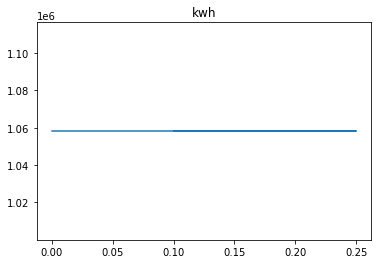

In [56]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(subdf['wwr'], subdf['kwh'], color='tab:blue')
plt.title('kwh')
plt.show()

In [39]:
result = {}
for row in soup.findAll('tr'):
    tds = row.findAll('td')
    for i in range(len(tds)):
        if 'Grand total' in tds[i].get_text():

            result['kwh'] = float(tds[i+1].get_text())
            result['kwhm2'] = float(tds[i+2].get_text())               

In [54]:
computational = []
computational.append({'wwr_ratio': 0.1, 'total_time': 274.8782720565796, 'simu_time': 234.21225500106812})
computational.append({'wwr_ratio': 0.2, 'total_time': 275.2745244503021, 'simu_time': 237.71506309509277})
computational.append({'wwr_ratio': 0.3, 'total_time': 282.6419041156769, 'simu_time': 247.83287835121155})
computational.append({'wwr_ratio': 0.05, 'total_time': 258.96157598495483, 'simu_time': 224.94810485839844})

In [57]:
import pandas as pd

In [58]:
df = pd.DataFrame(computational)

In [64]:
df = df.sort_values(by=['wwr_ratio'])

In [65]:
df

,wwr_ratio,total_time,simu_time
3,0.05,258.961576,224.948105
0,0.10,274.878272,234.212255
1,0.20,275.274524,237.715063
2,0.30,282.641904,247.832878


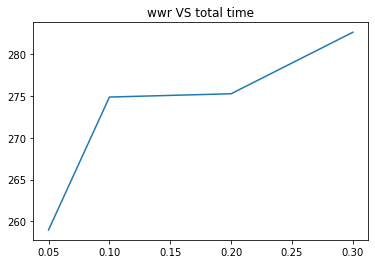

In [66]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(df['wwr_ratio'], df['total_time'], color='tab:blue')
plt.title('wwr VS total time')
plt.show()

In [75]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x= df["wwr_ratio"], y=df["total_time"], 
#                     mode='lines',
                    name='Total time'))
fig.add_trace(go.Scatter(x= df["wwr_ratio"], y=df["simu_time"],
#                     mode='lines',
                    name='Simulation time'))

fig.show()